In [1]:
import json

In [2]:
from ipynb.fs.full.quantumsystem import QuantumSystem, qs

In [3]:
class XYLocation(QuantumSystem.System):
    @classmethod
    def get_relationship(cls, entity_id):
        return json.loads(super().get_relationship(entity_id))

    @classmethod
    def validate(cls, terminant):
        if len(terminant) != 2:
            raise Exception(f"Unrecognized terminant: {terminant}")
        return json.dumps([int(d) for d in terminant])
    
    @classmethod
    def origin(cls):
        return (0, 0)

In [4]:
class MovementShape(QuantumSystem.System):
    """ Movement Speed Value """
    @classmethod
    def get_relationship(cls, entity_id):
        return int(super().get_relationship(entity_id))
        
    @classmethod
    def validate(cls, terminant):
        return str(int(terminant))

In [5]:
@XYLocation.sd
@MovementShape.sd
class Move(QuantumSystem.HyperSystem):
    @classmethod
    @XYLocation.d
    @MovementShape.d
    def move(cls, entity_id, delta, movementshape, xylocation):
        newLocation = [sL + lD for sL, lD in zip(xylocation, delta)]
        XYLocation.set_relationship(entity_id, newLocation)

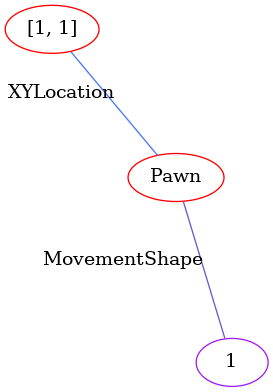

In [6]:
if __name__ == "__main__":
    from IPython.display import display
    qs.reset()
    Move.build_system("Pawn", {"XYLocation": [1, 1], "MovementShape": 1})
    display(qs.render())

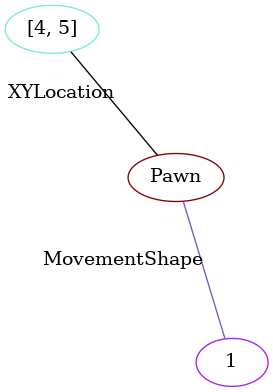

In [7]:
if __name__ == "__main__":
    Move.move(entity_id="Pawn", delta=[3, 4])
    display(qs.render())